## Installing Pyspark

In [1]:
!pip install pyspark
from pyspark.sql.functions import col

### Checking JAVA for Pyspark

In [2]:
import os
# Set JAVA_HOME environment variable
os.environ["JAVA_HOME"] = "/Users/jabedhossain/.sdkman/candidates/java/current"

# Verify that JAVA_HOME is set
print(os.environ["JAVA_HOME"])


/Users/jabedhossain/.sdkman/candidates/java/current


### Importing required library

In [3]:
import pandas as pd  # Imports the pandas library and aliases it as 'pd'. Pandas is commonly used for data manipulation and analysis in Python.

import numpy as np  # Imports the numpy library and aliases it as 'np'. Numpy provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

import matplotlib.pyplot as plt  # Imports the pyplot module from the matplotlib library and aliases it as 'plt'. Matplotlib is a plotting library in Python, and pyplot provides a MATLAB-like interface for creating plots and visualizations.

import seaborn as sns  # Imports the seaborn library for statistical data visualization. Seaborn is built on top of matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

from scipy import stats  # Imports the stats module from the scipy library. Scipy is an open-source library for mathematics, science, and engineering, and the stats module provides functions for statistical analysis and computations.

### Starting Spark Session

In [4]:
import pyspark
from pyspark.sql import SparkSession

In [5]:
## Setting up a SparkSession with local execution mode and all available CPU cores

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("FireDataAnalysisv2") \
    .getOrCreate()

KeyboardInterrupt: 

In [ ]:
# Setting a Spark configuration to enable eager evaluation of Spark SQL queries in the REPL environment
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

NameError: name 'spark' is not defined

This feature can be quite helpful when working interactively in a notebook environment,as it allows you to see the results of DataFrames and SQL queries immediately without needingto call an action like .show().

# Import Data

In [ ]:
df=pd.read_csv('fires_data.csv')

In [ ]:
df.head()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
0,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,Westminster,E05013807,Vincent Square,Electricity,Washing machine,Wiring insulation,Kitchen,HOOVER,NaN,Quattro AS110
1,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013654,Camden Square,Electricity,Washing machine,Plastic - raw material only,Kitchen,CANDY,NaN,Aquaviva 120T
2,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,1,E09000016,Havering,E05013969,Elm Park,Electricity,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM,NaN,Fridge Freezer model not known
3,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000022,Lambeth,E05014113,Streatham Hill East,Electricity,Tumble dryer - Standard,Other textiles,Kitchen,NaN,NaN,NaN
4,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013660,Haverstock,Electricity,Fridge/Freezer,Other item,Kitchen,BOSCH,NaN,ClassicXX


# Reading data into a Spark Dataframe

In [ ]:

# Read the CSV file 'Fire Data' into a Spark DataFrame named 'Fire_Deaths'
Fire_Deaths = spark.read.csv('fires_data.csv', header=True, sep=",")


NameError: name 'spark' is not defined

This line reads the CSV file named ‘fires_data.csv’ into a DataFrame called Fire_Deaths. The header=True option specifies that the first row of the CSV file contains column headers. The sep="," option indicates that the fields are separated by commas.

## Data Descriptions
### Fire Data
Year: Data spans from 2009 to 2024.
Number of Fire Death: 
                        Total : 4727
                        Max: 71
Number of Fire Injuries: 
                        Total : 4727 
                        Maximum : 109 

Maximum Fire death event:
    Year: June 2017
    Num fire deaths : 71
    Num all fire injuries: 109
    Ignition Source power: Electricity
    Ignition Source : Fridge
    Ignition Location : Kitchen
    

In [ ]:
df.describe()

,Year,NumFireDeaths,NumAllFireInjuries
count,4727.000000,4727.000000,4727.000000
mean,2015.849164,0.017982,0.143008
std,4.266648,1.037334,1.694214
min,2009.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000
50%,2016.000000,0.000000,0.000000
75%,2019.000000,0.000000,0.000000
max,2024.000000,71.000000,109.000000


In [ ]:
display(df)

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
0,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,Westminster,E05013807,Vincent Square,Electricity,Washing machine,Wiring insulation,Kitchen,HOOVER,NaN,Quattro AS110
1,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013654,Camden Square,Electricity,Washing machine,Plastic - raw material only,Kitchen,CANDY,NaN,Aquaviva 120T
2,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,1,E09000016,Havering,E05013969,Elm Park,Electricity,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM,NaN,Fridge Freezer model not known
3,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000022,Lambeth,E05014113,Streatham Hill East,Electricity,Tumble dryer - Standard,Other textiles,Kitchen,NaN,NaN,NaN
4,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013660,Haverstock,Electricity,Fridge/Freezer,Other item,Kitchen,BOSCH,NaN,ClassicXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,2024,January,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000027,RICHMOND UPON THAMES,E05013778,HAMPTON,Electricity,Washer/Dryer combined,Clothing,Kitchen,INDESIT,NaN,IWDE126 (UK)
4723,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000017,HILLINGDON,E05013569,HAYES TOWN,Electricity,Washing machine,Plastic - raw material only,Kitchen,HOTPOINT,NaN,t-200
4724,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000019,ISLINGTON,E05013697,ARSENAL,Electricity,Dishwasher,Wiring insulation,Kitchen,BOSCH,NaN,Classicxx
4725,2024,January,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,CAMDEN,E05013669,ST. PANCRAS & SOMERS TOWN,Electricity,Washing machine,Plastic - raw material only,Kitchen,Other,no make visible,unknown


In [ ]:
max_firedeaths= df.loc[df["NumFireDeaths"].idxmax()]
print(max_firedeaths)

Year                                                     2017
Month                                                    June
IncType                                          Primary Fire
ParentPropertyType            Purpose Built Flats/Maisonettes
NumFireDeaths                                              71
NumAllFireInjuries                                        109
IncGeo_BoroughCode                                  E09000020
IncGeo_BoroughName                     KENSINGTON AND CHELSEA
IncGeo_WardCode                                     E05009399
IncGeo_WardName                                  NOTTING DALE
IgnitionSourcePower                               Electricity
IgnitionSource                  Fridge/Freezer - Freestanding
ItemFirstIgnited                                    Not known
LocationFireStarted                                   Kitchen
ApplianceManufacturer                                HOTPOINT
ApplianceManufacturerOther                                NaN
MainCaus

The idxmax() function finds the index of the maximum value, and loc uses that index to retrieve the entire row. 

In [ ]:
# Group by 'IncGeo_BoroughName' and count the occurrences
borough_incident_counts = df['IncGeo_BoroughName'].value_counts()

# Get the top 5 boroughs with the most incidents
top_boroughs = borough_incident_counts.head(5)

# Display the results
print(top_boroughs)

IncGeo_BoroughName
BARNET       137
CROYDON      131
Croydon      116
SOUTHWARK    115
LAMBETH      113
Name: count, dtype: int64


value_counts() method to count the occurrences of each unique value in the IncGeo_BoroughName column, 
sorts them in descending order, and then the head(5) method is used to get the top 5 entries.

In [ ]:
Fire_Deaths.show(5)

+----+-----+------------+--------------------+-------------+------------------+------------------+------------------+---------------+-------------------+-------------------+--------------------+--------------------+-------------------+---------------------+--------------------------+--------------------+
|Year|Month|     IncType|  ParentPropertyType|NumFireDeaths|NumAllFireInjuries|IncGeo_BoroughCode|IncGeo_BoroughName|IncGeo_WardCode|    IncGeo_WardName|IgnitionSourcePower|      IgnitionSource|    ItemFirstIgnited|LocationFireStarted|ApplianceManufacturer|ApplianceManufacturerOther|      MainCauseModel|
+----+-----+------------+--------------------+-------------+------------------+------------------+------------------+---------------+-------------------+-------------------+--------------------+--------------------+-------------------+---------------------+--------------------------+--------------------+
|2009| June|Primary Fire|Purpose Built Fla...|            0|                 0|   

In [ ]:
Fire_Deaths.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- IncType: string (nullable = true)
 |-- ParentPropertyType: string (nullable = true)
 |-- NumFireDeaths: string (nullable = true)
 |-- NumAllFireInjuries: string (nullable = true)
 |-- IncGeo_BoroughCode: string (nullable = true)
 |-- IncGeo_BoroughName: string (nullable = true)
 |-- IncGeo_WardCode: string (nullable = true)
 |-- IncGeo_WardName: string (nullable = true)
 |-- IgnitionSourcePower: string (nullable = true)
 |-- IgnitionSource: string (nullable = true)
 |-- ItemFirstIgnited: string (nullable = true)
 |-- LocationFireStarted: string (nullable = true)
 |-- ApplianceManufacturer: string (nullable = true)
 |-- ApplianceManufacturerOther: string (nullable = true)
 |-- MainCauseModel: string (nullable = true)



## Creating Database on Apache Spark: 

In [ ]:
# Create or replace a temporary view using the DataFrame
Fire_Deaths.createOrReplaceTempView("fire_deaths_view")

Fire_Deaths.createOrReplaceTempView("fire_deaths_view"): This line creates a temporary view named fire_deaths_view using the Fire_Deaths DataFrame. If a view with the same name already exists, it will be replaced.

In [ ]:
# Now you can run SQL queries against the view
# For example, to select everything from the view, you can use:
spark.sql("SELECT * FROM fire_deaths_view").show()

+----+---------+------------+--------------------+-------------+------------------+------------------+--------------------+---------------+-------------------+-------------------+--------------------+--------------------+-------------------+---------------------+--------------------------+--------------------+
|Year|    Month|     IncType|  ParentPropertyType|NumFireDeaths|NumAllFireInjuries|IncGeo_BoroughCode|  IncGeo_BoroughName|IncGeo_WardCode|    IncGeo_WardName|IgnitionSourcePower|      IgnitionSource|    ItemFirstIgnited|LocationFireStarted|ApplianceManufacturer|ApplianceManufacturerOther|      MainCauseModel|
+----+---------+------------+--------------------+-------------+------------------+------------------+--------------------+---------------+-------------------+-------------------+--------------------+--------------------+-------------------+---------------------+--------------------------+--------------------+
|2009|     June|Primary Fire|Purpose Built Fla...|            0|

spark.sql("SELECT * FROM fire_deaths_view"): This line demonstrates how you can run an SQL query against the temporary view. The show() method is called to display the results of the query.

Temporary views are session-scoped and will disappear if the session that created them terminates. If you need a view that persists beyond the lifetime of the Spark application, consider creating a global temporary view with createOrReplaceGlobalTempView() instead.

### Convert the whole DataFrame to Panda Dataframe 

In [ ]:
fire_deaths_view_df = spark.sql("SELECT * FROM fire_deaths_view").toPandas()

display(fire_deaths_view_df)

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
0,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000033,Westminster,E05013807,Vincent Square,Electricity,Washing machine,Wiring insulation,Kitchen,HOOVER,NULL,Quattro AS110
1,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013654,Camden Square,Electricity,Washing machine,Plastic - raw material only,Kitchen,CANDY,NULL,Aquaviva 120T
2,2009,June,Primary Fire,Purpose Built Flats/Maisonettes,0,1,E09000016,Havering,E05013969,Elm Park,Electricity,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM,NULL,Fridge Freezer model not known
3,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000022,Lambeth,E05014113,Streatham Hill East,Electricity,Tumble dryer - Standard,Other textiles,Kitchen,NULL,NULL,NULL
4,2009,July,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,Camden,E05013660,Haverstock,Electricity,Fridge/Freezer,Other item,Kitchen,BOSCH,NULL,ClassicXX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,2024,January,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000027,RICHMOND UPON THAMES,E05013778,HAMPTON,Electricity,Washer/Dryer combined,Clothing,Kitchen,INDESIT,NULL,IWDE126 (UK)
4723,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000017,HILLINGDON,E05013569,HAYES TOWN,Electricity,Washing machine,Plastic - raw material only,Kitchen,HOTPOINT,NULL,t-200
4724,2024,February,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000019,ISLINGTON,E05013697,ARSENAL,Electricity,Dishwasher,Wiring insulation,Kitchen,BOSCH,NULL,Classicxx
4725,2024,January,Primary Fire,Purpose Built Flats/Maisonettes,0,0,E09000007,CAMDEN,E05013669,ST. PANCRAS & SOMERS TOWN,Electricity,Washing machine,Plastic - raw material only,Kitchen,Other,no make visible,unknown


In [ ]:
fire_deaths_view_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727 entries, 0 to 4726
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        4727 non-null   object
 1   Month                       4727 non-null   object
 2   IncType                     4727 non-null   object
 3   ParentPropertyType          4727 non-null   object
 4   NumFireDeaths               4727 non-null   object
 5   NumAllFireInjuries          4727 non-null   object
 6   IncGeo_BoroughCode          4727 non-null   object
 7   IncGeo_BoroughName          4727 non-null   object
 8   IncGeo_WardCode             4726 non-null   object
 9   IncGeo_WardName             4726 non-null   object
 10  IgnitionSourcePower         4727 non-null   object
 11  IgnitionSource              4727 non-null   object
 12  ItemFirstIgnited            4727 non-null   object
 13  LocationFireStarted         4727 non-null   obje

In [ ]:
fire_deaths_view_df.describe()

,Year,Month,IncType,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,IncGeo_BoroughCode,IncGeo_BoroughName,IncGeo_WardCode,IncGeo_WardName,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer,ApplianceManufacturerOther,MainCauseModel
count,4727,4727,4727,4727,4727,4727,4727,4727,4726,4726,4727,4727,4727,4727,4725,4727,4727
unique,16,12,2,25,5,10,33,66,688,1061,5,13,33,33,181,258,2827
top,2018,October,Primary Fire,Dwelling,0,0,E09000008,BARNET,E05013806,St. James's,Electricity,Washing machine,Wiring insulation,Kitchen,HOTPOINT,NULL,NULL
freq,360,442,4719,2105,4718,4406,247,137,30,25,4713,1568,1419,3427,804,4174,532


## SQL Query :

### Total incident per area 

In [ ]:
# Group by 'IncGeo_BoroughName' and count the number of incidents
incident_counts = Fire_Deaths.groupBy("IncGeo_BoroughName").count()

# Order the results in descending order of count and take the top 5
top_boroughs = incident_counts.orderBy(col("count").desc()).limit(5)

# Show the results
top_boroughs.show()


+------------------+-----+
|IncGeo_BoroughName|count|
+------------------+-----+
|            BARNET|  137|
|           CROYDON|  131|
|           Croydon|  116|
|         SOUTHWARK|  115|
|           LAMBETH|  113|
+------------------+-----+



Fire_Deaths.groupBy("IncGeo_BoroughName"): This part groups the data in the Fire_Deaths DataFrame based 
on unique values in the IncGeo_BoroughName column. Each group corresponds to a different borough name.

.count(): This method counts the number of records (fire incidents) in each group (borough).

incident_counts.orderBy(col("count").desc()): This part orders the groups created by the groupBy method in descending order based on the count of incidents. The col("count") function is used to specify the column generated by the count() method, and .desc() specifies that the sorting should be in descending order.

.limit(5): This method limits the result to the top 5 entries after sorting.

### Total incident per year : 

In [ ]:
# Group by 'Year' and count the number of incidents
incident_counts_by_year = Fire_Deaths.groupBy("Year").count()

# Order the results in descending order of count and take the top 5
highest_dead_by_year = incident_counts_by_year.orderBy(col("count").desc()).limit(5)

# Show the results
highest_dead_by_year.show()

+----+-----+
|Year|count|
+----+-----+
|2018|  360|
|2012|  341|
|2017|  334|
|2019|  331|
|2011|  329|
+----+-----+



### For each year and each borough, what the worst-case incident

In [ ]:
from pyspark.sql.functions import col, max

# Execute SQL queries to find the maximum deaths and injuries by year and area
max_deaths_injuries_by_year_area = spark.sql("""
    SELECT
        Year,
        IncGeo_BoroughName,
        MAX(CAST(NumFireDeaths AS INT)) AS MaxDeaths,
        MAX(CAST(NumAllFireInjuries AS INT)) AS MaxInjuries,
        IgnitionSourcePower
    FROM
        fire_deaths_view
    GROUP BY
        Year, IncGeo_BoroughName, IgnitionSourcePower
    ORDER BY
        MaxDeaths DESC, MaxInjuries DESC
""")

# Show the results
max_deaths_injuries_by_year_area.show()


+----+--------------------+---------+-----------+-------------------+
|Year|  IncGeo_BoroughName|MaxDeaths|MaxInjuries|IgnitionSourcePower|
+----+--------------------+---------+-----------+-------------------+
|2017|KENSINGTON AND CH...|       71|        109|        Electricity|
|2011|               Brent|        6|          2|        Electricity|
|2023|              HARROW|        2|          0|        Electricity|
|2010|              Harrow|        1|          3|        Electricity|
|2014|      Waltham Forest|        1|          1|        Electricity|
|2010|              Merton|        1|          1|        Electricity|
|2017|          WANDSWORTH|        1|          1|        Electricity|
|2017|             BROMLEY|        1|          1|        Electricity|
|2020|             BROMLEY|        1|          0|        Electricity|
|2010|            Lewisham|        0|         19|        Electricity|
|2018|BARKING AND DAGENHAM|        0|          7|        Electricity|
|2014|          Wand

The result of this query will show you, for each year and each borough, what the worst-case incident was in terms of deaths and injuries, along with the source of ignition for that worst-case incident. It does not show the total number of deaths or injuries for the year or borough; rather, it shows the maximum number of deaths and injuries that occurred in a single incident within each group.

##### SELECT Clause: It specifies the columns to be included in the final result.

###### Year: 
The year of the incident.
###### IncGeo_BoroughName: 
The name of the borough where the incident occurred.
###### MAX(CAST(NumFireDeaths AS INT)) AS MaxDeaths: 
The maximum number of deaths recorded in a single incident for each combination of year, borough, and incident source.
###### MAX(CAST(NumAllFireInjuries AS INT)) AS MaxInjuries: 
The maximum number of injuries recorded in a single incident for each combination of year, borough, and incident source.
###### IgnitionSourcePower: 
The source of ignition that caused the fire.

##### FROM Clause: 
It indicates the temporary view (fire_deaths_view) that the query is accessing, which is based on the Fire_Deaths DataFrame.

##### GROUP BY Clause: 
It groups the data by Year, IncGeo_BoroughName, and IgnitionSourcePower. This means the aggregation functions like MAX will be applied to each unique group defined by these three fields.

##### ORDER BY Clause: 
It orders the results first by MaxDeaths in descending order and then by MaxInjuries in descending order. This means the rows with the highest number of deaths will appear first, and within those, the rows with the highest number of injuries will appear first.

### Total death by year :

This query calculates the total number of deaths and injuries for each year across all areas. It does not consider the area or the reason for the incident; it simply adds up all the deaths and injuries for each year.

In [ ]:
from pyspark.sql.functions import col, sum

# Execute SQL queries to find the total deaths and injuries by year
total_deaths_injuries_by_year = spark.sql("""

SELECT
    Year,
    SUM(CAST(NumFireDeaths AS INT)) AS TotalDeaths,
    SUM(CAST(NumAllFireInjuries AS INT)) AS TotalInjuries
FROM
    fire_deaths_view
GROUP BY
    Year
ORDER BY
    TotalDeaths DESC, TotalInjuries DESC

""")

# Show the results for total deaths and injuries by year
total_deaths_injuries_by_year.show()

+----+-----------+-------------+
|Year|TotalDeaths|TotalInjuries|
+----+-----------+-------------+
|2017|         73|          134|
|2011|          6|           55|
|2010|          2|           77|
|2023|          2|           24|
|2014|          1|           53|
|2020|          1|           20|
|2018|          0|           52|
|2012|          0|           50|
|2013|          0|           43|
|2016|          0|           39|
|2009|          0|           35|
|2021|          0|           27|
|2015|          0|           26|
|2019|          0|           23|
|2022|          0|           13|
|2024|          0|            5|
+----+-----------+-------------+



### Total death by area:

The total deaths and injuries for each area across all years

In [ ]:
# Execute SQL queries to find the total deaths and injuries by area
total_deaths_injuries_by_area = spark.sql("""

SELECT
    IncGeo_BoroughName,
    SUM(CAST(NumFireDeaths AS INT)) AS TotalDeaths,
    SUM(CAST(NumAllFireInjuries AS INT)) AS TotalInjuries
FROM
    fire_deaths_view
GROUP BY
    IncGeo_BoroughName
ORDER BY
    TotalDeaths DESC, TotalInjuries DESC

""")

# Show the results for total deaths and injuries by year
total_deaths_injuries_by_area.show()

+--------------------+-----------+-------------+
|  IncGeo_BoroughName|TotalDeaths|TotalInjuries|
+--------------------+-----------+-------------+
|KENSINGTON AND CH...|         71|          111|
|               Brent|          6|           10|
|             BROMLEY|          2|           12|
|              HARROW|          2|            9|
|              Harrow|          1|           13|
|      Waltham Forest|          1|            9|
|          WANDSWORTH|          1|            4|
|              Merton|          1|            3|
|            Lewisham|          0|           34|
|             Croydon|          0|           27|
|             CROYDON|          0|           21|
|              BEXLEY|          0|           19|
|             Bromley|          0|           18|
|            Haringey|          0|           17|
|              Ealing|          0|           17|
|              Camden|          0|           16|
|            Hounslow|          0|           15|
|          Wandswort

## Converting SQL Result to pandas dataframe

### Total incident per area 

In [ ]:
# Convert the Spark DataFrame to a Pandas DataFrame
top_boroughs = top_boroughs.toPandas()

# Display the Pandas DataFrame
print(top_boroughs)

  IncGeo_BoroughName  count
0             BARNET    137
1            CROYDON    131
2            Croydon    116
3          SOUTHWARK    115
4            LAMBETH    113


The SQL query selects the IncGeo_BoroughName column, counts the number of incidents for each borough, groups the results by borough name, orders them in descending order by the count, and limits the output to the top 5 boroughs with the most incidents.
toPandas() converts the resulting Spark DataFrame to a Pandas DataFrame for further analysis or visualization in Python.

### Total incident per year 

In [ ]:
highest_dead_by_year = highest_dead_by_year.toPandas()

print(highest_dead_by_year)

AttributeError: 'DataFrame' object has no attribute 'toPandas'

### For each year and each borough, what the worst-case incident

In [ ]:
max_deaths_injuries_by_year_area = max_deaths_injuries_by_year_area.toPandas()

print(max_deaths_injuries_by_year_area)

AttributeError: 'DataFrame' object has no attribute 'toPandas'

### Total death by year :

In [ ]:
total_deaths_injuries_by_year = total_deaths_injuries_by_year.toPandas()

print(total_deaths_injuries_by_year)

    Year  TotalDeaths  TotalInjuries
0   2017           73            134
1   2011            6             55
2   2010            2             77
3   2023            2             24
4   2014            1             53
5   2020            1             20
6   2018            0             52
7   2012            0             50
8   2013            0             43
9   2016            0             39
10  2009            0             35
11  2021            0             27
12  2015            0             26
13  2019            0             23
14  2022            0             13
15  2024            0              5


### Total death per area :

In [ ]:
total_deaths_injuries_by_area = total_deaths_injuries_by_area.toPandas()

print(total_deaths_injuries_by_area)

        IncGeo_BoroughName  TotalDeaths  TotalInjuries
0   KENSINGTON AND CHELSEA           71            111
1                    Brent            6             10
2                  BROMLEY            2             12
3                   HARROW            2              9
4                   Harrow            1             13
..                     ...          ...            ...
61           TOWER HAMLETS            0              1
62    KINGSTON UPON THAMES            0              1
63          CITY OF LONDON            0              0
64    RICHMOND UPON THAMES            0              0
65          City of London            0              0

[66 rows x 3 columns]


### Plotting some graphs for Visualization :

In [ ]:
import matplotlib.pyplot as plt


from pyspark.sql.functions import col, sum

# Execute SQL queries to find the total deaths and injuries by year, ordered by Year
total_deaths_injuries_by_year_modify = spark.sql("""
SELECT
    Year,
    SUM(CAST(NumFireDeaths AS INT)) AS TotalDeaths,
    SUM(CAST(NumAllFireInjuries AS INT)) AS TotalInjuries
FROM
    fire_deaths_view
GROUP BY
    Year
ORDER BY
    Year ASC
""").toPandas()


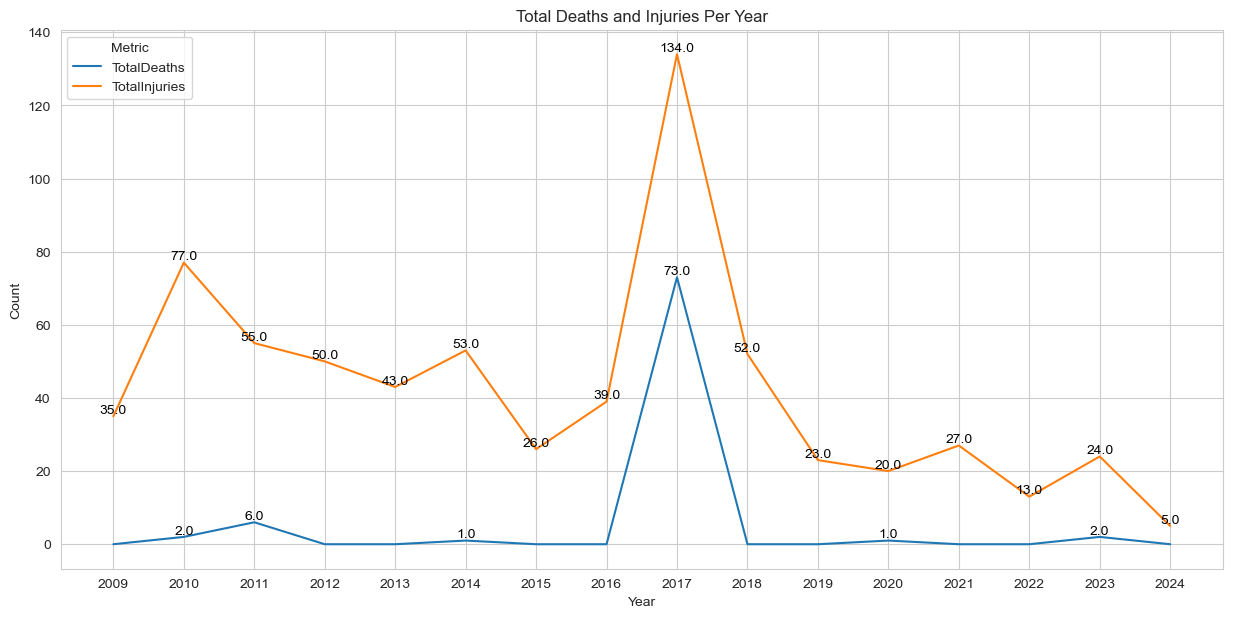

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(15, 7))

# Melt the DataFrame for Seaborn
melted_df = total_deaths_injuries_by_year_modify.melt(id_vars=['Year'], value_vars=['TotalDeaths', 'TotalInjuries'])

# Create the line plot with hue for 'TotalDeaths' and 'TotalInjuries'
ax = sns.lineplot(x='Year', y='value', hue='variable', data=melted_df)

# Annotate each point with the total number, skipping those with a value of 0
for index, row in melted_df.iterrows():
    if row['value'] > 0:  # Check if the value is greater than 0
        ax.text(row['Year'], row['value'], 
                format(row['value'], '.1f'), 
                color='black', ha="center", va="bottom")

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Deaths and Injuries Per Year')

# Adjust the legend
plt.legend(title="Metric", loc="upper left")

# Display the plot
plt.show()


Here's a breakdown of what each part of the code does:

1. **Set Seaborn Style**:
   ```python
   sns.set_style("whitegrid")
   ```
   This line sets the visual theme for the plots. In this case, "whitegrid" is used, which provides a white background with gridlines.

2. **Create a Figure**:
   ```python
   plt.figure(figsize=(15, 7))
   ```
   This line creates a new figure for plotting with a specified size (width 15 inches and height 7 inches).

3. **Prepare the Data**:
   ```python
   melted_df = total_deaths_injuries_by_year_modify.melt(id_vars=['Year'], value_vars=['TotalDeaths', 'TotalInjuries'])
   ```
   This line transforms the DataFrame `total_deaths_injuries_by_year_modify` into a format suitable for Seaborn plotting. The `melt` function changes the DataFrame from wide to long format, where 'Year' is the identifier variable, and 'TotalDeaths' and 'TotalInjuries' are the measured variables.

4. **Create the Line Plot**:
   ```python
   ax = sns.lineplot(x='Year', y='value', hue='variable', data=melted_df)
   ```
   This line creates a line plot with 'Year' on the x-axis, the count ('value') on the y-axis, and different lines for 'TotalDeaths' and 'TotalInjuries' indicated by the 'hue' parameter. The result is stored in the variable `ax`, which represents the Axes object containing the plot.

5. **Annotate the Plot**:
   ```python
   for index, row in melted_df.iterrows():
       if row['value'] > 0:  # Check if the value is greater than 0
           ax.text(row['Year'], row['value'], 
                   format(row['value'], '.1f'), 
                   color='black', ha="center", va="bottom")
   ```
   This loop goes through each row in the melted DataFrame and adds a text annotation to the plot for each data point, but only if the 'value' is greater than 0. The `ax.text` method places the text at the specified coordinates with the given alignment and color.

6. **Set Labels and Title**:
   ```python
   plt.xlabel('Year')
   plt.ylabel('Count')
   plt.title('Total Deaths and Injuries Per Year')
   ```
   These lines set the x-axis label to 'Year', the y-axis label to 'Count', and the title of the plot to 'Total Deaths and Injuries Per Year'.

7. **Adjust the Legend**:
   ```python
   plt.legend(title="Metric", loc="upper left")
   ```
   This line modifies the legend of the plot, setting its title to 'Metric' and positioning it in the upper left corner of the plot.

8. **Display the Plot**:
   ```python
   plt.show()
   ```
   Finally, this line renders the plot and displays it to the user.

The code is designed to provide a clear visual representation of the total deaths and injuries per year, with annotations that give exact values for each data point, enhancing the interpretability of the plot.

In [ ]:
import matplotlib.pyplot as plt


from pyspark.sql.functions import col, sum

# Total Deaths and Injuries by Area
total_deaths_injuries_by_area_modify = spark.sql("""
    SELECT
        IncGeo_BoroughName,
        SUM(CAST(NumFireDeaths AS INT)) AS TotalDeaths,
        SUM(CAST(NumAllFireInjuries AS INT)) AS TotalInjuries
    FROM
        fire_deaths_view
    GROUP BY
        IncGeo_BoroughName
    ORDER BY
        TotalDeaths DESC
""").toPandas()

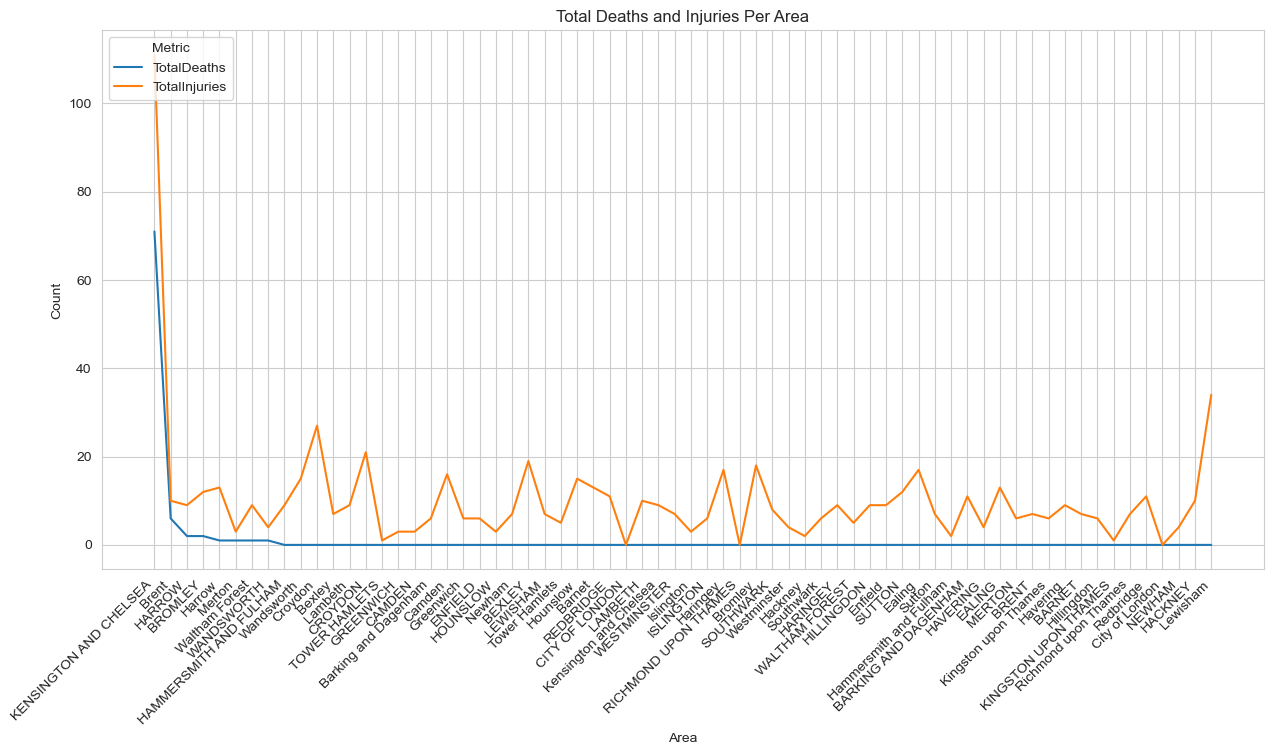

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(15, 7))

# Create the line plot with hue for 'TotalDeaths' and 'TotalInjuries'
sns.lineplot(x='IncGeo_BoroughName', y='value', hue='variable', data=total_deaths_injuries_by_area_modify.melt(id_vars=['IncGeo_BoroughName'], value_vars=['TotalDeaths', 'TotalInjuries']))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Total Deaths and Injuries Per Area')

# Adjust the legend
plt.legend(title="Metric", loc="upper left")

# Display the plot
plt.show()

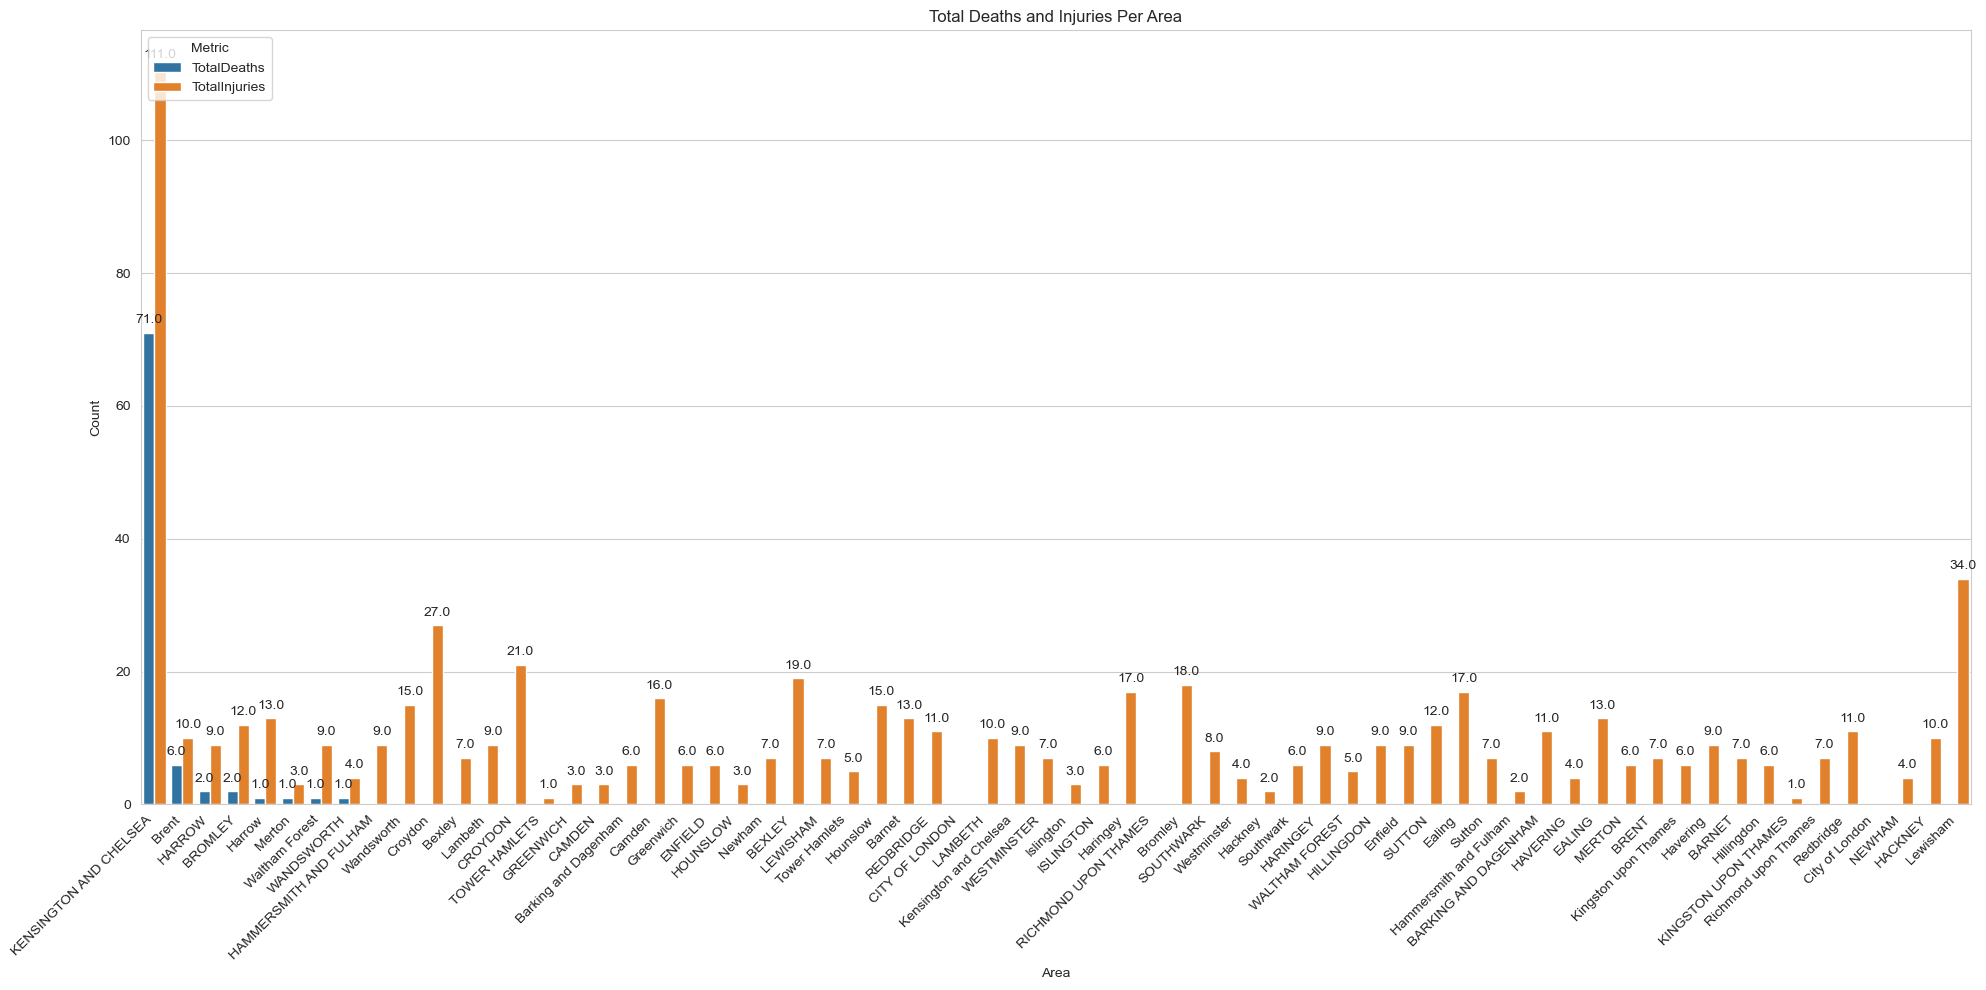

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Melt the DataFrame for Seaborn
melted_df = total_deaths_injuries_by_area_modify.melt(id_vars=['IncGeo_BoroughName'], value_vars=['TotalDeaths', 'TotalInjuries'])

# Create a bar plot with hue for 'TotalDeaths' and 'TotalInjuries'
ax = sns.barplot(x='IncGeo_BoroughName', y='value', hue='variable', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Total Deaths and Injuries Per Area')

# Annotate each bar with the total number, skipping those with a value of 0
for p in ax.patches:
    if p.get_height() > 0:  # Check if the bar height is greater than 0
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

# Adjust the legend
plt.legend(title="Metric", loc="upper left")

# Display the plot
plt.tight_layout()  # Adjust layout to fit the rotated x-axis labels
plt.show()


Here's what each part of the code does:

1. **Set Seaborn Style**:
   ```python
   sns.set_style("whitegrid")
   ```
   This line sets the visual theme for the plots. "whitegrid" provides a white background with gridlines, which is helpful for seeing the boundaries of the bars.

2. **Create a Figure**:
   ```python
   plt.figure(figsize=(20, 10))
   ```
   This line creates a new figure for plotting with a specified size (width 20 inches and height 10 inches).

3. **Prepare the Data**:
   ```python
   melted_df = total_deaths_injuries_by_area_modify.melt(id_vars=['IncGeo_BoroughName'], value_vars=['TotalDeaths', 'TotalInjuries'])
   ```
   This line transforms the DataFrame `total_deaths_injuries_by_area_modify` into a format suitable for Seaborn plotting. The `melt` function changes the DataFrame from wide to long format, where 'IncGeo_BoroughName' is the identifier variable, and 'TotalDeaths' and 'TotalInjuries' are the measured variables.

4. **Create the Bar Plot**:
   ```python
   ax = sns.barplot(x='IncGeo_BoroughName', y='value', hue='variable', data=melted_df)
   ```
   This line creates a bar plot with 'IncGeo_BoroughName' on the x-axis, the count ('value') on the y-axis, and different bars for 'TotalDeaths' and 'TotalInjuries' indicated by the 'hue' parameter. The result is stored in the variable `ax`, which represents the Axes object containing the plot.

5. **Rotate X-axis Labels**:
   ```python
   plt.xticks(rotation=45, ha='right')
   ```
   This line rotates the labels on the x-axis by 45 degrees and aligns them to the right, which helps in making long labels readable.

6. **Set Labels and Title**:
   ```python
   plt.xlabel('Area')
   plt.ylabel('Count')
   plt.title('Total Deaths and Injuries Per Area')
   ```
   These lines set the x-axis label to 'Area', the y-axis label to 'Count', and the title of the plot to 'Total Deaths and Injuries Per Area'.

7. **Annotate the Bars**:
   ```python
   for p in ax.patches:
       if p.get_height() > 0:
           ax.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
   ```
   This loop goes through each bar in the plot and adds a text annotation above the bar for its height, but only if the bar's height is greater than 0. The `ha` and `va` parameters control the alignment of the text, and `xytext` provides a small offset to position the text above the bar.

8. **Adjust the Legend**:
   ```python
   plt.legend(title="Metric", loc="upper left")
   ```
   This line modifies the legend of the plot, setting its title to 'Metric' and positioning it in the upper left corner of the plot.

9. **Display the Plot**:
   ```python
   plt.tight_layout()
   plt.show()
   ```
   The `plt.tight_layout()` method adjusts the plot layout to make sure everything fits without overlapping, and `plt.show()` renders the plot and displays it to the user.

The code is designed to provide a clear visual representation of the total deaths and injuries per area, with annotations that give exact values for each bar, enhancing the interpretability of the plot.